<a href="https://colab.research.google.com/github/SolemnShark871/Churn/blob/main/SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules & Load data

In [2]:
# !pip install pandas-profiling==2.7.1

## General packages
import pandas as pd
import numpy as np
import seaborn as sn
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA


## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Churn') #Thomas & Favio & Juan
os.listdir("./")


df_lamda = pd.read_csv('not_scaled_not_lambda_merged.csv', index_col = [0])

df_lamda.head()

Mounted at /content/drive


,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,HD_TP,IN_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,HD_HR,IN_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,SE_HR,SM_HR,SO_HR,TD_HR,.NET,.NET Core,ANGULAR,AWS,...,8,9,28,31,35,41,45,56,59,AC_PN,ADM_PN,AI_PN,AP_PN,CO_PN,HD_PN,IN_PN,NE_PN,OP_PN,PD_PN,PM_PN,SE_PN,SM_PN,SO_PN,TD_PN,ADM_RS,AP_RS,CO_RS,HD_RS,IN_RS,NE_RS,OP_RS,PD_RS,PM_RS,SE_RS,SM_RS,SO_RS,EDAD,GENERO,TIEMPO_EMP,LABEL
288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,1,5,1
492,0,13,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,3,0.0,48.50,0.0,0.0,0.0,0,0.0,0.0,1971.18,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,22,1
1061,0,18,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0.0,129.00,0.0,0.0,0.0,0,0.0,0.0,0.00,1826.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1244,0,0,0,0,0,0,96,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,30,0,57,0
1500,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.0,68.00,0.0,0.0,0.0,0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,1,0
313,0,18,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,10,0.0,146.25,0.0,281.5,0.0,0,0.0,0.0,0.00,1590.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1,11,1


## TODO 

  - Split the data into test & train 
  - Cross validation? K-folds
  - Data augmentation (?) 
  - PCA 
      - Is this a new dataset?
      - How many components 
  - Training the model 

  $F$: copy from ML the TT split, we also need to do cross val

  $T$:  


## Training SVM

In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_lamda.drop(['LABEL'],axis = 1)
y = df_lamda['LABEL']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [ ]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.03,0.1,0.3,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__kernel = ['sigmoid','poly','rbf'])

In [ ]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=2,scoring='accuracy', n_jobs=-1)

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


In [ ]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch


rbf =   svm.SVC(kernel = 'rbf', C= 1, class_weight = 'balanced', gamma = 'scale', decision_function_shape ='ovr', random_state=1234)
rbf.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=1234)

In [ ]:
# ##apply PCA to reduce the number of features
# pca = PCA(n_components=25)
# principalComponents = pca.fit_transform(X)

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(principalComponents, y, test_size=0.8, random_state=1234, stratify = y)

#### Results (performance)

In [ ]:
# retrieve the accuracy
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

0.7615894039735099


In [ ]:
y_pred = rbf.predict(X_test)

In [ ]:
name = 'accuracy'
metric = round(metrics.accuracy_score(y_test, y_pred),4)


print(f"SVM's {name}: {metric*100}%" )
print()

print('----------Model report on all classes ----------')
print(classification_report(y_test,y_pred))


SVM's accuracy: 76.16000000000001%

----------Model report on all classes ----------
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       108
           1       0.82      0.80      0.81       194

    accuracy                           0.76       302
   macro avg       0.74      0.75      0.74       302
weighted avg       0.76      0.76      0.76       302



In [ ]:
labels = [0, 1]
y_predict = rbf.predict(X_test.values)
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


,precision,recall,f1-score,support
non retired,0.657895,0.694444,0.675676,108.000000
retired,0.824468,0.798969,0.811518,194.000000
accuracy,0.761589,0.761589,0.761589,0.761589
macro avg,0.741181,0.746707,0.743597,302.000000
weighted avg,0.764899,0.761589,0.762939,302.000000


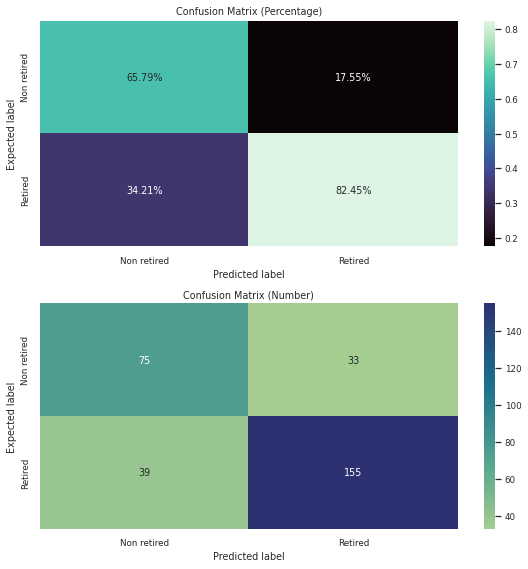

In [ ]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()

## Train using the PCA data

In [ ]:
df_pca = pd.read_csv('pca_merged_scaled.csv', index_col = [0])

df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LAMBDA,LABEL
643,-0.012914,-0.000624,0.002716,-0.006315,0.003908,0.001826,0.004136,-0.002478,-0.004217,-0.001587,0.004379,-0.002271,0.001394,0.000686,0.001134,0.001527,-0.000562,-0.001267,0.000019,-0.007108,-0.001033,-0.002460,-0.004552,-0.002840,-0.000628,-0.002375,0.000086,-0.001501,-0.000645,-0.002191,0.007064,-0.001658,0.000774,0.004206,0.003016,0.004982,0.003472,-0.003934,0.006553,-0.001804,...,0.003248,-0.006797,0.014357,-0.003288,-0.003430,-0.008984,-0.009917,0.002426,0.000598,0.004289,-0.002648,-0.002146,-0.001157,-0.007084,0.003625,0.001947,-0.005483,-0.009724,-0.000504,0.014057,-0.012090,-0.001354,0.002911,0.006457,0.001989,0.004190,0.003194,0.001035,0.002304,-0.001881,0.002870,-0.011580,0.002363,-0.000029,0.009491,0.006421,0.012853,-0.003783,-0.248733,1
418,-0.012398,-0.001501,0.005389,-0.003728,0.005402,0.001744,0.000684,0.002610,-0.001762,0.001587,0.000338,0.000238,0.002997,-0.004371,0.000526,-0.002169,0.000179,-0.000465,0.001108,-0.005724,0.003085,-0.004225,-0.003379,-0.003061,-0.002822,0.001433,-0.001031,0.001527,-0.001183,0.001236,0.009431,-0.000615,-0.000725,0.005094,-0.001494,0.006415,0.002002,-0.002322,0.003132,-0.003038,...,-0.006379,0.003862,0.006754,-0.004087,-0.001477,-0.006619,0.006821,-0.003882,-0.001203,-0.008963,0.005917,-0.001766,-0.007953,0.001349,0.003938,-0.007753,0.005836,-0.002569,0.004906,0.006122,0.002875,-0.004580,-0.011406,0.007307,-0.009882,-0.001271,0.006460,-0.004177,-0.002913,0.006393,-0.003424,-0.003035,-0.008541,-0.008236,-0.014250,-0.004688,0.002098,-0.001181,-1.045758,1
558,0.000522,0.002168,-0.012190,0.006482,-0.001947,-0.007577,-0.006836,0.004002,0.004902,-0.001824,-0.005806,0.003951,-0.002156,-0.017562,-0.010136,-0.007828,-0.001924,-0.002034,-0.000218,0.009230,-0.008374,0.000777,0.007442,0.000185,0.010888,0.002410,0.001054,-0.012099,0.001806,0.004676,0.007440,-0.014774,-0.000441,0.010066,0.009160,0.005225,0.003762,-0.006703,-0.001976,-0.002395,...,0.004911,0.010966,-0.002093,0.005097,0.007466,0.007516,0.009846,0.007770,-0.013074,0.014815,-0.012023,-0.010737,-0.006359,0.006120,-0.004131,0.002188,-0.034588,-0.006156,0.023148,0.010127,0.013786,0.021372,-0.010541,0.004614,-0.010972,0.017556,-0.002368,0.029494,0.002037,0.007334,0.010962,-0.021081,0.012549,0.000022,-0.000204,0.002748,0.014298,0.013941,-1.045758,1
1474,-0.011249,-0.001203,0.005202,-0.003744,0.004520,0.002133,-0.000460,0.002521,-0.001005,0.001370,0.000191,0.000215,0.004279,-0.005123,0.000269,-0.003415,-0.000090,-0.000179,0.000823,-0.005553,0.001505,-0.002039,-0.004324,-0.002919,-0.004622,0.003473,0.000771,0.002423,-0.000045,-0.000760,0.003919,0.001139,-0.000353,0.001806,-0.003548,0.002523,0.000443,-0.000956,-0.002013,-0.000483,...,-0.006244,-0.000160,0.012871,-0.011404,0.001219,-0.003675,0.006551,-0.003054,0.000071,-0.000815,0.004242,-0.000765,-0.009351,-0.002717,-0.005084,0.002978,-0.002674,-0.005537,0.002365,-0.007604,0.002374,0.001341,0.000647,0.003472,0.003140,0.000835,0.004554,0.001033,-0.000508,-0.006476,0.006536,-0.001346,0.002155,0.000604,-0.014189,0.001082,0.001091,0.005026,1.510269,0
1500,-0.012188,-0.001384,0.005175,-0.003988,0.004806,0.002418,0.000967,0.001882,-0.001834,0.001155,0.001061,-0.000543,0.003253,-0.003671,0.000890,-0.002113,-0.000040,0.000688,0.000600,-0.006530,0.002113,-0.003278,-0.003574,-0.002766,-0.003822,0.002057,-0.000192,0.002435,-0.001308,-0.000120,0.007460,0.000412,-0.000505,0.003227,-0.002694,0.005882,0.000964,-0.001846,0.000681,-0.002467,...,-0.006356,0.001627,0.005671,-0.005602,0.000499,-0.007508,0.006254,-0.000881,-0.002049,-0.003921,0.005398,-0.002810,-0.006753,-0.001362,-0.000121,0.001445,0.002145,-0.002686,0.004007,0.001653,0.006323,0.003697,-0.008420,0.001700,-0.003271,-0.001784,0.006808,-0.003920,-0.004043,0.001939,0.0

In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_pca.drop(['LABEL'],axis = 1)
y =df_pca['LABEL']

print(y.value_counts()) #the problem 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

1    969
0    537
Name: LABEL, dtype: int64


In [ ]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.03,0.1,0.3,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__kernel = ['sigmoid','poly','rbf'])

In [ ]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=2,scoring='accuracy', n_jobs=-1)

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'clf__C': 1, 'clf__class_weight': None, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
{'clf__C': 1, 'clf__class_weight': None, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


In [ ]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch


rbf =   svm.SVC(kernel = 'rbf', C= 1, class_weight = None, gamma = 'scale', decision_function_shape ='ovr', random_state=1234)
rbf.fit(X_train, y_train)

SVC(C=1, random_state=1234)

#### Results (performance)

In [ ]:
# retrieve the accuracy
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

0.9205298013245033


In [ ]:
y_pred = rbf.predict(X_test)

In [ ]:
name = 'accuracy'
metric = round(metrics.accuracy_score(y_test, y_pred),4)


print(f"SVM's {name}: {metric*100}%" )
print()

print('----------Model report on all classes ----------')
print(classification_report(y_test,y_pred))


SVM's accuracy: 92.05%

----------Model report on all classes ----------
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       108
           1       0.89      1.00      0.94       194

    accuracy                           0.92       302
   macro avg       0.94      0.89      0.91       302
weighted avg       0.93      0.92      0.92       302



In [ ]:
labels = [0, 1]
y_predict = rbf.predict(X_test.values)
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


,precision,recall,f1-score,support
non retired,1.000000,0.777778,0.875000,108.000000
retired,0.889908,1.000000,0.941748,194.000000
accuracy,0.920530,0.920530,0.920530,0.920530
macro avg,0.944954,0.888889,0.908374,302.000000
weighted avg,0.929279,0.920530,0.917878,302.000000


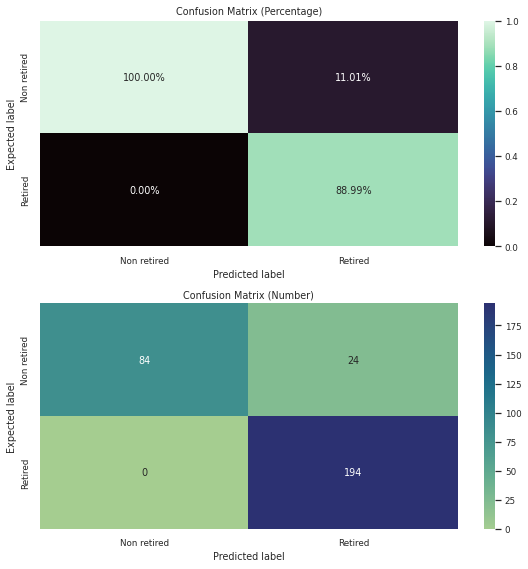

In [ ]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()

## Using the unbiased dataset

After some analysis from Alejo, we realised our datasets had been preprocessed incorrectly. Instead of standardising the entire (combined) dataset, we standardised seperately for the non-retired (0) and the retired (1) datasets. This requires all our models to be retrained using the properly standardised (unbiased) dataset.  

In [4]:
df_unbiased = pd.read_csv('pca_merged_standarised.csv', index_col = [0])

df_unbiased.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LABEL
52,0.002173,0.001716,-0.021061,0.000720,-0.010720,-0.023021,-0.014812,-0.006131,0.011426,0.009021,-0.018375,-0.001679,0.019945,-0.002583,-0.004780,0.002768,-0.000065,0.001032,0.003126,0.019664,-0.009952,-0.001551,0.000776,0.008954,-0.002771,0.000066,0.012378,0.019983,0.019616,0.003670,-0.000707,-0.028996,-0.035064,-0.003035,-0.033826,0.000922,0.020035,0.016095,0.020431,-0.031847,...,0.029134,-0.013938,0.002114,0.034634,-0.032064,0.014791,-0.041500,-0.030818,-0.001857,-0.037291,-0.039452,0.038843,0.060082,0.020318,0.011862,-0.050294,0.074751,-0.001052,0.014474,0.027643,-0.019202,-0.048338,-0.066586,-0.028958,0.019906,0.018607,-0.021862,-0.052227,-0.004771,-0.024662,0.039370,0.019396,0.013585,-0.026295,-0.004273,-0.051951,-0.004326,-0.024402,0.021800,1
1231,-0.005195,-0.000929,0.002936,-0.004817,0.003539,-0.002596,-0.002070,0.001770,0.001100,-0.002428,-0.001425,0.002430,-0.003667,0.007758,-0.004459,-0.005438,0.001771,0.001866,-0.006047,0.002443,-0.009091,0.013334,-0.004621,-0.003886,-0.001469,0.004443,0.000072,0.008943,0.025966,-0.013559,0.009367,0.009006,0.006243,-0.004863,0.001828,-0.011100,-0.000655,0.004101,-0.002043,0.005604,...,-0.027324,0.003181,0.005233,-0.013815,-0.019358,-0.009985,0.016991,-0.006215,-0.013536,0.026927,-0.010332,0.009446,-0.017978,0.005287,0.002304,0.011706,0.007848,0.014901,-0.026588,0.015308,-0.021073,0.018668,-0.025931,0.001506,-0.025388,0.023444,-0.027548,-0.027304,0.036985,-0.014550,-0.022130,-0.001256,-0.020752,0.000377,0.004983,-0.003888,-0.020009,0.010655,-0.039711,0
640,0.000130,-0.002779,0.001002,-0.002665,-0.010629,-0.007178,-0.008098,0.003339,0.006026,0.005638,-0.009753,0.003890,-0.005816,0.002391,0.004780,-0.005630,0.002842,0.003112,-0.005391,0.003183,0.003988,0.002904,0.005891,-0.002835,0.000343,0.010468,-0.003413,-0.003036,0.001267,-0.005427,0.011775,0.008520,-0.002348,-0.007456,-0.001857,-0.007295,-0.000033,0.008115,-0.004478,0.006363,...,0.002021,0.013229,0.013421,-0.004627,-0.001019,-0.009472,-0.017779,0.004524,-0.003982,0.005743,0.005892,0.009452,-0.001644,0.001206,-0.011085,-0.000386,-0.010093,-0.008454,0.000257,-0.001363,-0.006846,0.018310,-0.011071,-0.006517,0.010688,-0.011632,0.028354,-0.009157,0.014791,0.002947,-0.006524,0.006312,0.007660,-0.002696,-0.020283,0.008208,-0.001418,-0.017295,-0.008378,1
141,-0.013191,-0.001269,0.004372,-0.004111,0.005700,0.001739,0.001768,0.001760,-0.002424,0.000252,0.000755,0.000905,-0.001955,0.004699,0.000888,-0.000758,-0.000202,-0.002061,0.002250,-0.006225,0.003212,-0.005885,-0.003524,-0.003520,-0.000253,-0.003444,-0.004091,-0.003314,-0.013330,0.006313,-0.005369,0.002699,0.000495,0.010325,0.001633,0.004636,-0.001166,-0.002734,0.004872,-0.001605,...,0.004647,-0.005761,0.001812,-0.010149,0.000442,-0.002433,-0.008257,-0.001126,-0.002201,-0.000458,0.004013,-0.002919,0.009931,0.011074,0.009394,-0.008709,-0.002269,0.002166,-0.018191,-0.000857,-0.005166,-0.002715,0.002338,-0.002183,0.005167,0.005126,0.001562,0.003085,0.008495,0.010079,-0.005662,-0.005000,-0.009789,-0.003767,0.005654,0.000256,-0.002148,-0.015892,-0.000414,1
1244,0.011193,0.002374,-0.013989,0.015905,0.012283,-0.003254,-0.006936,0.001417,0.008474,-0.009437,-0.000560,0.005393,0.002874,0.017929,-0.012773,-0.003185,-0.001987,-0.001091,0.000923,0.015524,-0.012288,0.014271,-0.003022,0.005627,0.004196,-0.004053,0.003375,-0.007302,0.020917,0.001947,0.005846,-0.007330,-0.001553,0.006705,0.012862,-0.010215,0.000122,-0.001150,0.009307,-0.010198,...,-0.008110,0.003183,-0.010345,0.007025,-0.002324,0.011908,-0.033462,0.006942,0.041578,0.005400,-0.030306,0.007772,0.015144,-0.016266,-0.004601,-0.020831,-0.018774,-0.026769,0.001299,0.001939,-0.063604,0.027839,0.009423,0.004998,-0.019655,-0.010444,0.057280,-0.019978,-0.030563,0.029940,0

In [7]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_unbiased.drop(['LABEL'],axis = 1)
y =df_unbiased['LABEL']

print(y.value_counts()) #the problem 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

1    969
0    537
Name: LABEL, dtype: int64


In [8]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.03,0.1,0.3,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__kernel = ['sigmoid','poly','rbf'])

In [9]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=2,scoring='accuracy', n_jobs=-1)

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'clf__C': 0.3, 'clf__class_weight': 'balanced', 'clf__gamma': 'scale', 'clf__kernel': 'sigmoid'}
{'clf__C': 0.3, 'clf__class_weight': 'balanced', 'clf__gamma': 'scale', 'clf__kernel': 'sigmoid'}


In [16]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch


rbf =   svm.SVC(kernel = 'rbf', C= 0.3, class_weight = 'balanced', gamma = 'scale', decision_function_shape ='ovr', random_state=1234)
rbf.fit(X_train, y_train)

SVC(C=0.3, class_weight='balanced', random_state=1234)

#### Results (performance)

In [17]:
# retrieve the accuracy
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

0.7019867549668874


In [18]:
y_pred = rbf.predict(X_test)

In [19]:
name = 'accuracy'
metric = round(metrics.accuracy_score(y_test, y_pred),4)


print(f"SVM's {name}: {metric*100}%" )
print()

print('----------Model report on all classes ----------')
print(classification_report(y_test,y_pred))


SVM's accuracy: 70.19999999999999%

----------Model report on all classes ----------
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       108
           1       0.78      0.75      0.76       194

    accuracy                           0.70       302
   macro avg       0.68      0.68      0.68       302
weighted avg       0.71      0.70      0.70       302



In [20]:
labels = [0, 1]
y_predict = rbf.predict(X_test.values)
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


,precision,recall,f1-score,support
non retired,0.577586,0.620370,0.598214,108.000000
retired,0.779570,0.747423,0.763158,194.000000
accuracy,0.701987,0.701987,0.701987,0.701987
macro avg,0.678578,0.683897,0.680686,302.000000
weighted avg,0.707337,0.701987,0.704171,302.000000


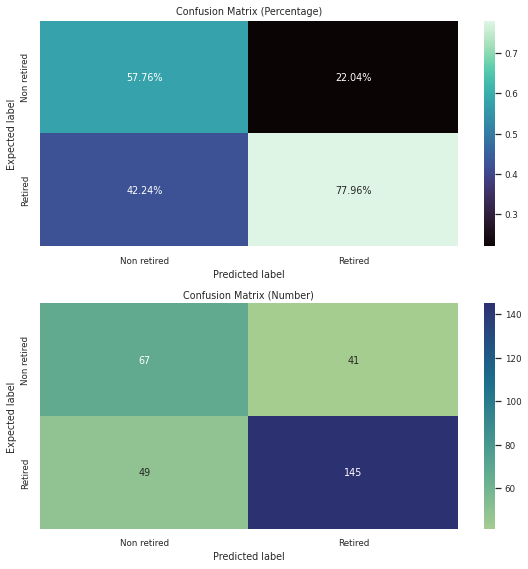

In [21]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()